<a href="https://colab.research.google.com/github/rn0x7f/MATLAB_Uni/blob/master/Construcci%C3%B3n_de_Ecuaciones_Diferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: Modelando situaciones "Construcción de Ecuaciones Diferenciales"
## Renato García Morán A01799387
Actividad realizada con Python.  
Librerias:  
* Pandas (Creación de la tabla)
* Numpy (Calculos)
* scipy (Calculos)
* sympy (Calculos)
* Matplotlib (Graficar)
* Seaborn (Graficar)  

El código puede observarse haciendo click en "mostrar código" en la celda deseada en el siguiente enlace:  
https://colab.research.google.com/drive/1gKc4KtUg3zPjTE9RVJ_GhQFfLPwoeEAe?usp=sharing

In [1]:
#@title (Código) Importaciones necesarias
import pandas as pd # Dataframes
import numpy as np # Arreglos de datos
from matplotlib import pyplot as plt # Graficar
import seaborn as sns # Graficar
from scipy.optimize import curve_fit # Forzar ajuste del polinomio a c=0
from scipy.integrate import solve_ivp # Calculo de la ecuacion diferencial
from scipy.interpolate import interp1d # Para calcular nuevos P

# Considera los datos siguientes de una población de bacterias en el tiempo (población experimental)
```
t (días)	0	  1	  2	  3	  4	  5	  6	  7	  8	  9	  10	11
P(miles)	100	190	320	480	640	780	880	940	970	990	995
```

# 1) Construye una tabla con las columnas $t$, $P$, $\frac{\Delta P}{\Delta t}$

In [2]:
#@title (Código) Calculo de $\frac{\Delta P}{\Delta t}$
# Días
t = np.arange(12)
print("t: ", t, "\n")
# Miles
P = np.array([100, 190, 320, 480, 640, 780, 880, 940, 970, 990, 995, 996])
print("P: ", P, "\n")
# Delta
delta = []
for i in range(len(t) - 1):
  calculo = ((P[i+1] - P[i]) //
            (t[i+1] - t[i]))
  delta.append(calculo)
  print(i, "- (", P[i+1], " - ", P[i], ") / (",
        t[i+1], " - ", t[i], ") = ", calculo)
print("\nDelta: ", delta)

t:  [ 0  1  2  3  4  5  6  7  8  9 10 11] 

P:  [100 190 320 480 640 780 880 940 970 990 995 996] 

0 - ( 190  -  100 ) / ( 1  -  0 ) =  90
1 - ( 320  -  190 ) / ( 2  -  1 ) =  130
2 - ( 480  -  320 ) / ( 3  -  2 ) =  160
3 - ( 640  -  480 ) / ( 4  -  3 ) =  160
4 - ( 780  -  640 ) / ( 5  -  4 ) =  140
5 - ( 880  -  780 ) / ( 6  -  5 ) =  100
6 - ( 940  -  880 ) / ( 7  -  6 ) =  60
7 - ( 970  -  940 ) / ( 8  -  7 ) =  30
8 - ( 990  -  970 ) / ( 9  -  8 ) =  20
9 - ( 995  -  990 ) / ( 10  -  9 ) =  5
10 - ( 996  -  995 ) / ( 11  -  10 ) =  1

Delta:  [90, 130, 160, 160, 140, 100, 60, 30, 20, 5, 1]


In [3]:
#@title (Código) Gracion de la tabla con $t$,$P$,$\frac{\Delta P}{\Delta t}$
# Construir un dataframe con los datos
data = pd.DataFrame()
data["t"] = t
data["P"] = P
# Quitar la ultima fila del DataFrame porque Delta mide 11 mientras que t y P miden 12
data = data.drop(data.index[-1])
data["Delta"] = delta
data

,t,P,Delta
0,0,100,90
1,1,190,130
2,2,320,160
3,3,480,160
4,4,640,140
5,5,780,100
6,6,880,60
7,7,940,30
8,8,970,20
9,9,990,5


# 2) Construye las gráficas de $t$ vs $P$ y  $P$ vs $\frac{\Delta P}{\Delta t}$

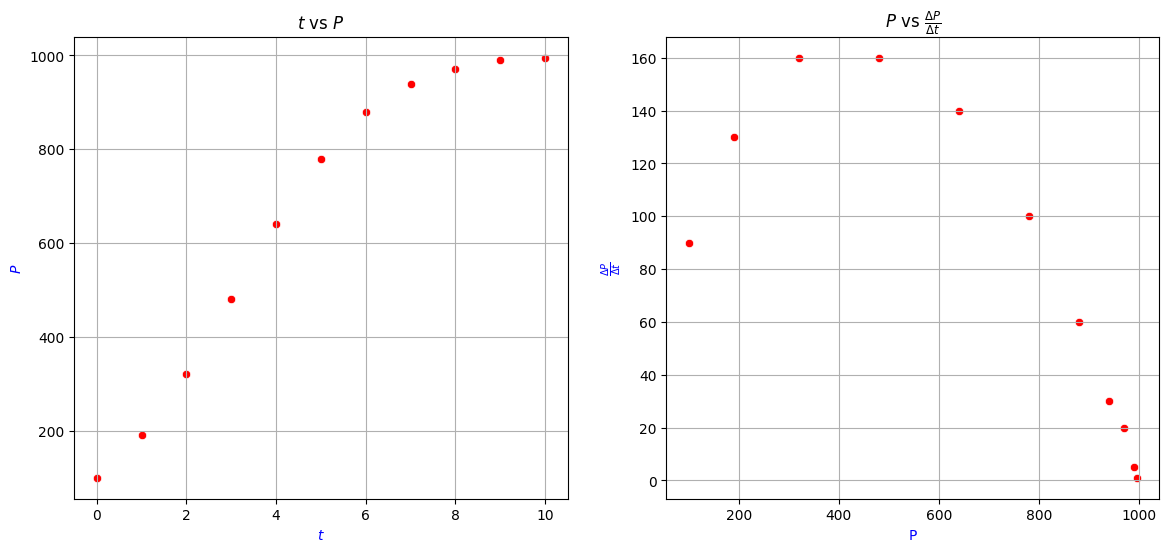

In [4]:
#@title (Código) Creación de las gráficas
# Dos gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# t vs P
sns.scatterplot(x="t", y="P", data=data, ax=axes[0], color="red")
axes[0].set_title("$t$ vs $P$")
axes[0].set_xlabel('$t$', color="blue")
axes[0].set_ylabel('$P$', color="blue")
axes[0].grid(True)
# P vs Delta
sns.scatterplot(x="P", y="Delta", data=data, ax=axes[1], color="red")
axes[1].set_title("$P$ vs $\\frac{\Delta P}{\Delta t}$")
axes[1].set_xlabel('P', color="blue")
axes[1].set_ylabel('$\\frac{\Delta P}{\Delta t}$', color="blue")
axes[1].grid(True)

# 3) Ajusta un polinomio de grado 2 del tipo $kP(1-\frac{P}{N})$ al conjunto de datos $P$, $\frac{\Delta P}{\Delta t}$.¿Qué valores obtuviste para $k$ y $N$?

Polinomio: -0.0005404884319377601 x^2 + 0.4854634960742571 x + 53.082898127938066


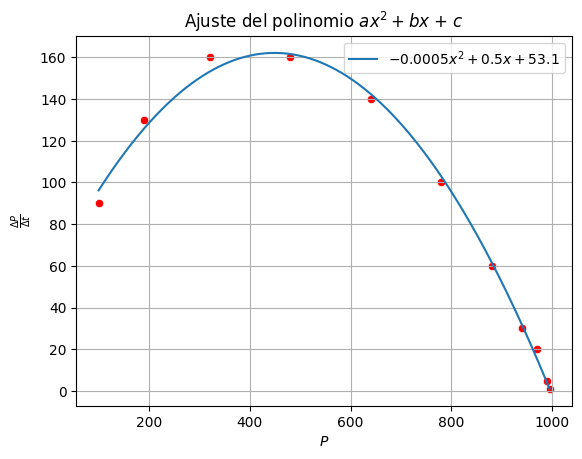

In [5]:
#@title (Código) Polinomio ajustado de la forma $ax^{2}+bx+c$.
coeficientes = np.polyfit(P[:-1], delta, 2)
# tendencia = np.polyval(coeficientes, P)
a, b, c = coeficientes
eje_x = np.arange(data["P"][0], data["P"].tail(1).item(), 0.1)
polinomio = a*np.square(eje_x)+b*eje_x+c
label_text = fr"${a:.4f}x^2 + {b:.1f}x + {c:.1f}$"

print("Polinomio:", a, "x^2 +",b, "x +", c)

plt.plot(eje_x, polinomio, label=label_text)
sns.scatterplot(x="P", y="Delta", data=data, color="red")
plt.title("Ajuste del polinomio $ax^2 + bx$ + $c$")
plt.xlabel("$P$")
plt.ylabel("$\\frac{\Delta P}{\Delta t}$")
plt.grid(True)

Polinomio ajustado: -0.000697711305491412 x^2 + 0.6891136963656452 x


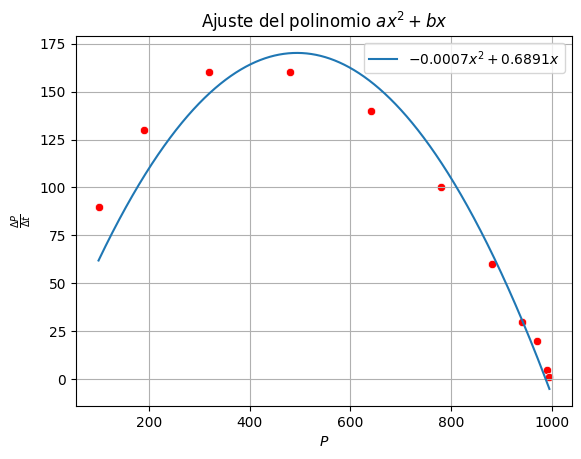

In [6]:
#@title (Código) Polinomio ajustado de la forma $ax^{2}+bx$

# Definir la función del polinomio de la forma ax^2 + bx
def modelo(x, a, b):
    return a * np.square(x) + b * x

# Ajustar los coeficientes a y b usando curve_fit
popt, _ = curve_fit(modelo, P[:-1], delta)

a, b = popt

eje_x = np.arange(data["P"][0], data["P"].tail(1).item(), 0.1)

# Evaluar el polinomio en el rango de eje_x
polinomio = a * np.square(eje_x) + b * eje_x

# Formatear la etiqueta con a y b
label_text = fr"${a:.4f}x^2 + {b:.4f}x$"

print("Polinomio ajustado:", a, "x^2 +", b, "x")

plt.plot(eje_x, polinomio, label=label_text)
sns.scatterplot(x="P", y="Delta", data=data, color="red")
plt.title("Ajuste del polinomio $ax^2 + bx$")
plt.xlabel("$P$")
plt.ylabel("$\\frac{\Delta P}{\Delta t}$")
plt.grid(True)
plt.legend()
plt.show()

## Calculo de $k$ y de $N$
Tenemos el siguiente polinomio:
$$-0.000697711305491412P^{2}+0.6891136963656452P$$
Osea:
$$0.6891136963656452P-0.000697711305491412P^{2}$$
Tenemos la siguiente ecuación diferencial:
$$\frac{dP}{dt}=kP(1-\frac{P}{N})$$
Podemos reescribrila de esta forma:
$$\frac{dP}{dt}=kP-kP(\frac{P}{N})\\
=kP-\frac{kP^{2}}{N}\\
=kP-\frac{K}{N}P^{2}$$
Donde:
$$k=0.6891136963656452$$
$$\frac{K}{N}=-0.000697711305491412$$
Entonces:
$$k=0.6891136963656452$$
$$N=-\frac{k}{0.000697711305491412}=-\frac{0.6891136963656452}{0.000697711305491412}$$

In [7]:
#@title (Código) Calculo de $k$ y $N$
k = b
N = - (k/a)
print("k: ", k)
print("N: ", N)

k:  0.6891136963656452
N:  987.6774117631486


## Resultados
$$k=0.6891136963656452$$
$$N=987.6774117631486$$

# 4) Con eso has construído la ecuación diferencial $\frac{dP}{dt}=kP(1-\frac{P}{N})$. Resuelve la ecuación diferencial. Llama a la $P$ obtenida como $P$ teórica.

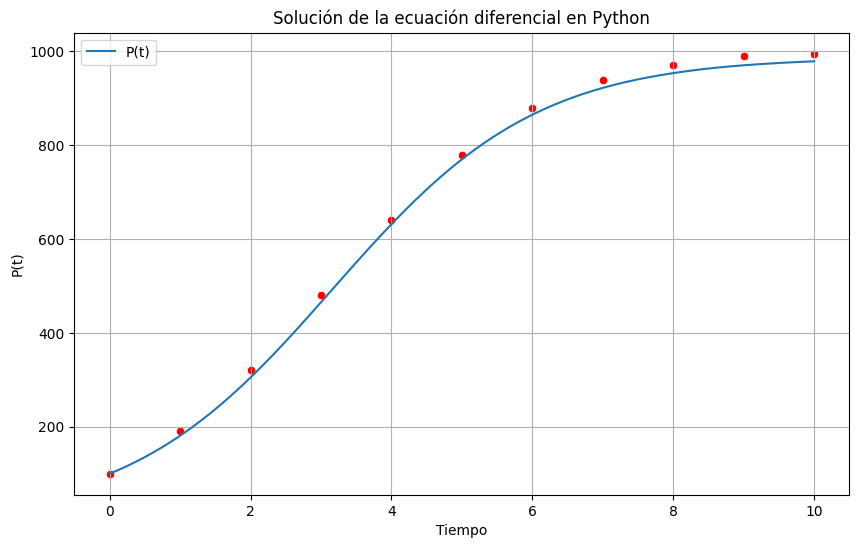

In [8]:
#@title Resolución y graficación de la ecuación diferencial hecha en Python
# Definimos la ecuación diferencial
def model(t, P):
    return k * P * (1 - P / N)

P0 = 100  # Valor inicial de P
t_span = (data["t"].head(1).item(), data["t"].tail(1).item())  # Intervalo de tiempo
t_eval = np.linspace(*t_span, 500)  # Tiempo de evaluación

# Resolver la ecuación diferencial
sol = solve_ivp(model, t_span, [P0], t_eval=t_eval)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='P(t)')
sns.scatterplot(x="t", y="P", data=data, color="red")
plt.xlabel('Tiempo')
plt.ylabel('P(t)')
plt.title('Solución de la ecuación diferencial en Python')
plt.legend()
plt.grid(True)
plt.show()

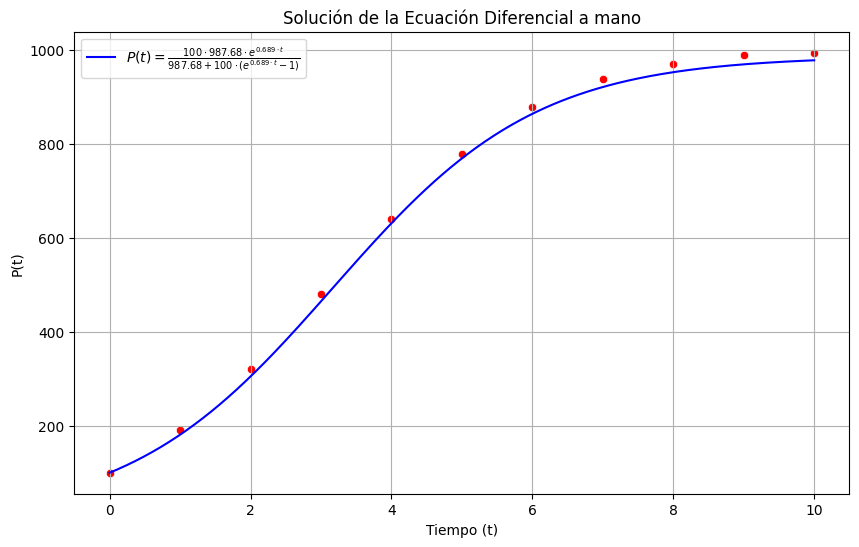

In [9]:
#@title Resolución y graficación de la ecuación diferencial hecha a mano
# Definir la función de la solución
def P(t):
    return P0 * N * np.exp(k * t) / (N + P0 * (np.exp(k * t) - 1))

# Crear un rango de valores para t
t = np.linspace(0, 10, 500)

# Calcular los valores de P(t)
P_values = P(t)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, P_values, label=r'$P(t) = \frac{100 \cdot 987.68 \cdot e^{0.689 \cdot t}}{987.68 + 100 \cdot (e^{0.689 \cdot t} - 1)}$', color='b')
sns.scatterplot(x="t", y="P", data=data, color="red")
plt.xlabel('Tiempo (t)')
plt.ylabel('P(t)')
plt.title('Solución de la Ecuación Diferencial a mano')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
#@title (Código) Datos finales
# Crear una función de interpolación
interp_func = interp1d(sol.t, sol.y[0], bounds_error=False, fill_value="extrapolate")

# Evaluar P en los valores de t del DataFrame
def evaluate_p(t):
    return interp_func(t)

# Crear una nueva columna en el DataFrame con los valores de P evaluados
data['P Evaluado'] = data['t'].apply(evaluate_p)

data

,t,P,Delta,P Evaluado
0,0,100,90,100.000000
1,1,190,130,181.019808
2,2,320,160,305.096334
3,3,480,160,465.397897
4,4,640,140,631.705355
5,5,780,100,769.967655
6,6,880,60,865.053964
7,7,940,30,922.225681
8,8,970,20,953.707269
9,9,990,5,970.365368


# Conclusiones
Se nos diero una serie de datos $P$ tomados en un intervalo $t$, los cuales fueron graficados y a los que se les calculo la tasa de cambio para dar con una nueva gráfica que de con una aproximación de la pendiente en cada punto, obtenida sacando la curva de tendencia. Observando la gráfica sabiamos que se podría aproximar un modelo logístico de población, para el cual resolvimos la ecuación diferencial y scando los valores de $k$ y $N$ obtenidos del polinomio aproximado a la tasa de cambio, dimos con la ecuación que aproximaría un modelo a nuestras muestras.